In [82]:
import numpy as np
import pandas as pd
import math
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import OrderedDict
import time


In [83]:
#Stores filenames for import
files = []

#Creates lists of filesnames for import
for i in range(1000):
    files.append('review_polarity/txt_sentoken/pos/t ('+str(i+1)+').txt')
    files.append('review_polarity/txt_sentoken/neg/f ('+str(i+1)+').txt')

#Load data into a data frame using a CountVectorizer
vectorizor = CountVectorizer(input='filename', stop_words='english')
data = vectorizor.fit_transform(files)
data = pd.DataFrame(data.todense(), columns=vectorizor.get_feature_names())

#Assign labels to dataframe based on import order
data['label'] = ['pos']*1000 + ['neg']*1000

#Shuffle the data
data = shuffle(data)

#Split data
test_data = data.tail(400).reset_index(drop=True)
T = data.iloc[0:100].reset_index(drop=True)
T_r = data.tail(1500).reset_index(drop=True)

# (i)

## Uncertainty Sampling

In [86]:
#Create linear SVM classifier
svc = LinearSVC(max_iter=10000)

#Constant that changes the number of labeled data added each loop
K = 10

#Copy the data as it will be mutated
q1_T = T.copy()
q1_T_r = T_r.copy()

#Used to store results. Keys will be the number of training samples
q1_results = OrderedDict()

#Initialize first key
key=100

#Loop untill break
while True:
    start = time.time()
    
    #Fit the model, and store results
    svc.fit(q1_T.drop(['label'],axis=1),q1_T['label'])
    q1_results[key] = [svc.score(test_data.drop(['label'],axis=1),test_data['label'])]
    
    #If there is data left to look through then use it
    if (len(q1_T_r)>0):
        
        #Generate uncertainty metric and take it's absolute value (approximates distance from margin)
        q1_T_r['un'] = np.absolute(svc.decision_function(q1_T_r.drop(['label'],axis=1)))
        
        #Sort the uncertainty to find the points closest to margin
        q1_T_r = q1_T_r.sort_values(by='un')
        
        #Add the K points with highest uncertanty to the training data
        q1_T = pd.concat([q1_T,q1_T_r.head(K).drop(['un'],axis=1)], ignore_index = True)
        
        #Drop the K points from the remainder set
        q1_T_r = q1_T_r.iloc[K:].drop(['un'],axis=1)
        end = time.time()
        print("Samples:"+str(key))
        print(end - start)
        
        #Increment key
        key+=K
        
    else: break
    
q1_results

Samples:100
1.4791419506072998
Samples:110
1.4871423244476318
Samples:120
1.5150036811828613
Samples:130
1.5482850074768066
Samples:140
1.4720675945281982
Samples:150
1.4819364547729492
Samples:160
1.4754290580749512
Samples:170
1.4985401630401611
Samples:180
1.4986097812652588
Samples:190
1.4633691310882568
Samples:200
1.4701919555664062
Samples:210
1.4514193534851074
Samples:220
1.4768390655517578
Samples:230
1.4660060405731201
Samples:240
1.4979064464569092
Samples:250
1.481560230255127
Samples:260
1.5148253440856934
Samples:270
1.5107409954071045
Samples:280
1.4967007637023926
Samples:290
1.5227530002593994
Samples:300
1.5299441814422607
Samples:310
1.5327918529510498
Samples:320
1.619680643081665
Samples:330
1.5500006675720215
Samples:340
1.5774900913238525
Samples:350
1.6822597980499268
Samples:360
1.6947550773620605
Samples:370
1.7932775020599365
Samples:380
1.6781997680664062
Samples:390
2.055968999862671
Samples:400
1.7181649208068848
Samples:410
1.574944019317627
Samples:420


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1470
13.376246213912964


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1480
11.44958233833313


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1490
14.519793272018433


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1500
14.939351797103882


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1510
14.789451837539673


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1520
14.462839365005493


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1530
14.445672512054443


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1540
14.779645442962646


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1550
14.671245098114014


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1560
15.17475175857544


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1570
15.120603084564209


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1580
15.882638454437256


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1590
15.423481941223145


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OrderedDict([(100, [0.5]),
             (110, [0.5225]),
             (120, [0.5025]),
             (130, [0.515]),
             (140, [0.505]),
             (150, [0.5175]),
             (160, [0.51]),
             (170, [0.505]),
             (180, [0.51]),
             (190, [0.515]),
             (200, [0.5225]),
             (210, [0.5575]),
             (220, [0.555]),
             (230, [0.5425]),
             (240, [0.545]),
             (250, [0.5375]),
             (260, [0.5325]),
             (270, [0.555]),
             (280, [0.5625]),
             (290, [0.5725]),
             (300, [0.5625]),
             (310, [0.5775]),
             (320, [0.565]),
             (330, [0.58]),
             (340, [0.585]),
             (350, [0.5925]),
             (360, [0.5875]),
             (370, [0.59]),
             (380, [0.6075]),
             (390, [0.6075]),
             (400, [0.6175]),
             (410, [0.62]),
             (420, [0.6175]),
             (430, [0.635]),
   

## Random Sampling

In [89]:
#This section repeats the previous methods however it picks random points to label
svc = LinearSVC(max_iter=10000)


K = 10

random_q1_T = T.copy()
random_q1_T_r = T_r.copy()

random_q1_results = OrderedDict()
key=100
while True:
    start = time.time()
    svc.fit(random_q1_T.drop(['label'],axis=1),random_q1_T['label'])
    random_q1_results[key] = [svc.score(test_data.drop(['label'],axis=1),test_data['label'])]
    
    if (len(random_q1_T_r)>0):
        random_q1_T = pd.concat([random_q1_T,random_q1_T_r.head(K)], ignore_index = True)
        random_q1_T_r = random_q1_T_r.iloc[K:]
        end = time.time()
        print("Samples:"+str(key))
        print(end - start)
    
        key+=K
        
    else: break
    
random_q1_results

Samples:100
0.36803722381591797
Samples:110
0.43935251235961914
Samples:120
0.4728209972381592
Samples:130
0.4749138355255127
Samples:140
0.49422526359558105
Samples:150
0.505122184753418
Samples:160
0.6303348541259766
Samples:170
0.5838608741760254
Samples:180
0.6696896553039551
Samples:190
0.6090555191040039
Samples:200
0.6355428695678711
Samples:210
0.636756181716919
Samples:220
0.6723356246948242
Samples:230
0.6782457828521729
Samples:240
0.709115743637085
Samples:250
0.7993860244750977
Samples:260
0.707122802734375
Samples:270
0.7123055458068848
Samples:280
0.7334105968475342
Samples:290
0.8133671283721924
Samples:300
0.8597824573516846
Samples:310
0.8088932037353516
Samples:320
0.9306402206420898
Samples:330
0.683373212814331
Samples:340
0.6623759269714355
Samples:350
0.7286231517791748
Samples:360
0.7709956169128418
Samples:370
0.7132017612457275
Samples:380
0.7111270427703857
Samples:390
0.7550184726715088
Samples:400
0.7251427173614502
Samples:410
0.7176108360290527
Samples:42

c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:800
6.615334749221802


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:810
6.841788053512573


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:820
6.943000078201294


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:830
6.818203449249268


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:840
6.836692810058594


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:850
6.9950270652771


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:860
6.931898832321167


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:870
7.04719614982605


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:880
7.421341419219971


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:890
7.246103048324585


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:900
7.6012914180755615


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:910
7.561753034591675


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:920
7.504480838775635


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:930
7.909543991088867


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:940
8.031163454055786


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:950
7.926563262939453


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:960
7.926753044128418


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:970
7.846010446548462


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:980
7.933584451675415


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:990
7.982538223266602


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1000
8.22205400466919


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1010
8.088335752487183


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1020
8.148097515106201


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1030
8.289447546005249


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1040
9.81188416481018


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1050
10.024121284484863


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1060
8.700784683227539


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1070
8.64384126663208


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1080
9.018198490142822


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1090
10.085349559783936


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1100
8.4086594581604


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1110
8.061614274978638


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1120
8.1671621799469


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1130
8.196056604385376


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1140
8.150848865509033


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1150
8.254156112670898


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1160
8.264410018920898


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1170
8.872955799102783


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1180
8.516029357910156


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1190
8.527034759521484


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1200
8.483146905899048


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1210
8.837722778320312


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1220
8.786583662033081


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1230
8.911832809448242


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1240
8.80452847480774


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1250
9.545641422271729


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1260
8.674124956130981


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1270
9.057915687561035


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1280
9.21611499786377


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1290
9.035301208496094


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1300
9.13327670097351


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1310
9.687325716018677


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1320
9.72534966468811


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1330
9.861654043197632


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1340
9.925904035568237


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1350
9.893685340881348


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1360
10.270095586776733


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1370
10.12389087677002


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1380
10.160375595092773


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1390
10.749279737472534


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1400
10.25783634185791


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1410
9.94417691230774


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1420
9.93798828125


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1430
10.250344514846802


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1440
12.100862741470337


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1450
12.56753659248352


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1460
13.210957050323486


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1470
12.423720121383667


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1480
12.245747089385986


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1490
12.197972536087036


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1500
12.307764291763306


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1510
12.788311958312988


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1520
12.303714036941528


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1530
11.618663787841797


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1540
12.07328486442566


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1550
11.80806589126587


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1560
13.73033094406128


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1570
14.73604440689087


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1580
14.61527705192566


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1590
13.51975131034851


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OrderedDict([(100, [0.5]),
             (110, [0.505]),
             (120, [0.5]),
             (130, [0.485]),
             (140, [0.5275]),
             (150, [0.51]),
             (160, [0.52]),
             (170, [0.51]),
             (180, [0.5075]),
             (190, [0.515]),
             (200, [0.515]),
             (210, [0.495]),
             (220, [0.495]),
             (230, [0.51]),
             (240, [0.51]),
             (250, [0.505]),
             (260, [0.5]),
             (270, [0.4675]),
             (280, [0.485]),
             (290, [0.4825]),
             (300, [0.48]),
             (310, [0.475]),
             (320, [0.4875]),
             (330, [0.5]),
             (340, [0.5025]),
             (350, [0.4875]),
             (360, [0.5]),
             (370, [0.495]),
             (380, [0.4925]),
             (390, [0.485]),
             (400, [0.48]),
             (410, [0.495]),
             (420, [0.4875]),
             (430, [0.47]),
             (440, [0.4

## Results

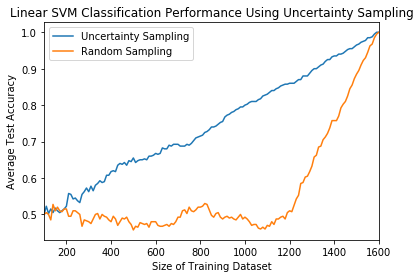

In [106]:
#Create and save plots
q1_results_test = pd.concat([pd.DataFrame.from_dict(q1_results), pd.DataFrame.from_dict(random_q1_results)]).transpose()
q1_results_test.columns = ["Uncertainty Sampling","Random Sampling"]

plot = q1_results_test.plot.line(title='Linear SVM Classification Performance Using Uncertainty Sampling')
plot.set_xlabel("Size of Training Dataset")
plot.set_ylabel("Average Test Accuracy")

#Display plot in Jupyter
plot

#Save plot
fig = plot.get_figure()
fig.savefig("Q2_i.pdf")

# (ii)

## Query by Committee

In [107]:
#Initialize three kinds of classifiers
svc = LinearSVC(max_iter=10000) #Support Vector Machine
dtc = DecisionTreeClassifier() #Decision Tree
knc = KNeighborsClassifier(n_jobs=-1) #K-Nearest Neighbors

#K-value 
K = 10

#Copy the data as it will be mutated
q2_T = T.copy()
q2_T_r = T_r.copy()
test_data = test_data.copy()

#Used to store results where key is the number of training data
q2_results = OrderedDict()
key=100

#Repeat untill break (no more data)
while True:
    #Fit all three models using initial points
    svc.fit(q2_T.drop(['label'],axis=1),q2_T['label'])
    dtc.fit(q2_T.drop(['label'],axis=1),q2_T['label'])
    knc.fit(q2_T.drop(['label'],axis=1),q2_T['label'])

    
    start = time.time()

    #Store the test predictions in a dictionary
    test_predictions = {
        #Predictions are mapped to 1 or -1 for positive and negative respectively for easy voting
        'svc': list(map(lambda x: 1 if x=='pos' else -1 ,svc.predict(test_data.drop(['label'],axis=1)))),
        'dtc': list(map(lambda x: 1 if x=='pos' else -1 ,dtc.predict(test_data.drop(['label'],axis=1)))),
        'knc': list(map(lambda x: 1 if x=='pos' else -1 ,knc.predict(test_data.drop(['label'],axis=1))))
    }
    
    #If the sum of a data points 3 predictions is >= 1 then majority voted positive, otherwise negative
    test_predictions = list(map(lambda a, b, c: 'pos' if (a+b+c)>=1 else 'neg', test_predictions['svc'], test_predictions['dtc'], test_predictions['knc']))
    
    #This could be turned into a zipped filter
    #Caclulates the number of corect predictions and devides by total for accuracy
    c=0
    for i, j in zip(test_data['label'], test_predictions):
        if i==j:
            c+=1
    q2_results[key]=[c/len(test_data['label'])]

    #If there is data left to look through then use it
    if (len(q2_T_r)>0):
        #Predictions for remaining data are mapped to 1 or -1 for positive and negative respectively for easy voting
        train_predictions = {
            'svc': list(map(lambda x: 1 if x=='pos' else -1 ,svc.predict(q2_T_r.drop(['label'],axis=1)))),
            'dtc': list(map(lambda x: 1 if x=='pos' else -1 ,dtc.predict(q2_T_r.drop(['label'],axis=1)))),
            'knc': list(map(lambda x: 1 if x=='pos' else -1 ,knc.predict(q2_T_r.drop(['label'],axis=1))))
        }
        
        #If the min sum of a data points 3 predictions is 1. Abs(sum) is used to classify as disagreeable or agreeable
        q2_T_r['un'] = list(map(lambda a, b, c: 'disagree' if abs(a+b+c)<=1 else 'agree', train_predictions['svc'], train_predictions['dtc'], train_predictions['knc']))
        
        #Sort the values so disagreeable ones are on top
        q2_T_r = q2_T_r.sort_values(by='un', ascending=False)
        
        #Add 10 disagreeable point to the training set
        q2_T = pd.concat([q2_T,q2_T_r.head(K).drop(['un'],axis=1)], ignore_index = True)
        
        #Remove those points from the remainder set
        q2_T_r = q2_T_r.iloc[K:].drop(['un'],axis=1)

        end = time.time()
        print("Samples:"+str(key))
        print(q2_results[key])
        print(end - start)

        key+=K

    else: break

        
q2_results



Samples:100
0.505
4.686506032943726
Samples:110
0.5125
4.847742557525635
Samples:120
0.5225
4.699097156524658
Samples:130
0.5375
5.319598436355591
Samples:140
0.5275
5.473541259765625
Samples:150
0.5275
5.55963397026062
Samples:160
0.5325
6.421372890472412
Samples:170
0.525
6.459392547607422
Samples:180
0.5275
7.0278613567352295
Samples:190
0.5525
6.588473796844482
Samples:200
0.535
6.804011821746826
Samples:210
0.545
6.817606210708618
Samples:220
0.5675
6.930883407592773
Samples:230
0.57
6.941657781600952
Samples:240
0.575
7.162959814071655
Samples:250
0.57
8.357483148574829
Samples:260
0.575
9.002363681793213
Samples:270
0.575
8.70496416091919
Samples:280
0.5825
9.224533796310425
Samples:290
0.5925
8.965046644210815
Samples:300
0.6
8.76755952835083
Samples:310
0.595
8.906464099884033
Samples:320
0.61
9.24878740310669
Samples:330
0.6125
9.850126028060913
Samples:340
0.6225
9.434823989868164
Samples:350
0.61
9.528520584106445
Samples:360
0.6
9.648245334625244
Samples:370
0.6125
9.79630

c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OrderedDict([(100, 0.505),
             (110, 0.5125),
             (120, 0.5225),
             (130, 0.5375),
             (140, 0.5275),
             (150, 0.5275),
             (160, 0.5325),
             (170, 0.525),
             (180, 0.5275),
             (190, 0.5525),
             (200, 0.535),
             (210, 0.545),
             (220, 0.5675),
             (230, 0.57),
             (240, 0.575),
             (250, 0.57),
             (260, 0.575),
             (270, 0.575),
             (280, 0.5825),
             (290, 0.5925),
             (300, 0.6),
             (310, 0.595),
             (320, 0.61),
             (330, 0.6125),
             (340, 0.6225),
             (350, 0.61),
             (360, 0.6),
             (370, 0.6125),
             (380, 0.6125),
             (390, 0.6225),
             (400, 0.5925),
             (410, 0.6025),
             (420, 0.605),
             (430, 0.615),
             (440, 0.605),
             (450, 0.6225),
             (460

## Random Sampling

In [110]:
#Same as above calculations except new training data is picked randomly

svc = LinearSVC(max_iter=10000)
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier(n_jobs=-1)


K = 10

random_q2_T = T.copy()
random_q2_T_r = T_r.copy()
test_data = test_data.copy()

random_q2_results = OrderedDict()
key=100
while True:
    svc.fit(random_q2_T.drop(['label'],axis=1),random_q2_T['label'])
    dtc.fit(random_q2_T.drop(['label'],axis=1),random_q2_T['label'])
    knc.fit(random_q2_T.drop(['label'],axis=1),random_q2_T['label'])

    
    start = time.time()

    #Store the test predictions in a dictionary
    random_test_predictions = {
        #Predictions are mapped to 1 or -1 for positive and negative respectively for easy voting
        'svc': list(map(lambda x: 1 if x=='pos' else -1 ,svc.predict(test_data.drop(['label'],axis=1)))),
        'dtc': list(map(lambda x: 1 if x=='pos' else -1 ,dtc.predict(test_data.drop(['label'],axis=1)))),
        'knc': list(map(lambda x: 1 if x=='pos' else -1 ,knc.predict(test_data.drop(['label'],axis=1))))
    }
    
    #If the sum of a data points 3 predictions is >= 1 then majority voted positive, otherwise negative
    random_test_predictions = list(map(lambda a, b, c: 'pos' if (a+b+c)>=1 else 'neg', random_test_predictions['svc'], random_test_predictions['dtc'], random_test_predictions['knc']))
    
    #This could be turned into a zipped filter
    #Caclulates the number of corect predictions and devides by total for accuracy
    c=0
    for i, j in zip(test_data['label'], random_test_predictions):
        if i==j:
            c+=1
    random_q2_results[key]=[c/len(test_data['label'])]
    

    if (len(random_q2_T_r)>0):
        random_q2_T = pd.concat([random_q2_T,random_q2_T_r.head(K)], ignore_index = True)
        random_q2_T_r = random_q2_T_r.iloc[K:]
        
        end = time.time()
        print("Samples:"+str(key))
        print(random_q2_results[key])
        print(end - start)

        key+=K

    else: break

        
random_q2_results

Samples:100
0.5
0.04887533187866211
Samples:110
0.505
0.04887509346008301
Samples:120
0.5225
0.04883599281311035
Samples:130
0.505
0.05884742736816406
Samples:140
0.5175
0.07579684257507324
Samples:150
0.5075
0.06682229042053223
Samples:160
0.515
0.07081055641174316
Samples:170
0.4825
0.06781768798828125
Samples:180
0.54
0.06981992721557617
Samples:190
0.52
0.0728142261505127
Samples:200
0.5075
0.07779669761657715
Samples:210
0.5125
0.07779407501220703
Samples:220
0.485
0.08179283142089844
Samples:230
0.505
0.08577919006347656
Samples:240
0.5125
0.09474563598632812
Samples:250
0.525
0.09075713157653809
Samples:260
0.51
0.09873604774475098
Samples:270
0.495
0.10073065757751465
Samples:280
0.5075
0.12067770957946777
Samples:290
0.5025
0.11871337890625
Samples:300
0.515
0.11469101905822754
Samples:310
0.495
0.11369466781616211
Samples:320
0.5025
0.11269807815551758
Samples:330
0.5025
0.11768412590026855
Samples:340
0.505
0.12466692924499512
Samples:350
0.5125
0.12765765190124512
Samples:3

c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:800
0.4825
0.2682821750640869


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:810
0.535
0.3012526035308838


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:820
0.5175
0.3221743106842041


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:830
0.5375
0.30419468879699707


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:840
0.54
0.28324198722839355


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:850
0.505
0.2872302532196045


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:860
0.52
0.2921886444091797


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:870
0.5
0.2943546772003174


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:880
0.5275
0.3001995086669922


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:890
0.495
0.3092076778411865


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:900
0.495
0.30219054222106934


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:910
0.4975
0.3031902313232422


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:920
0.4875
0.3113689422607422


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:930
0.5175
0.31818413734436035


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:940
0.5225
0.3071427345275879


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:950
0.4875
0.3390929698944092


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:960
0.4775
0.42482995986938477


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:970
0.495
0.3763415813446045


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:980
0.4975
0.38394951820373535


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:990
0.4725
0.418576717376709


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1000
0.4825
0.41210460662841797


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1010
0.51
0.40395617485046387


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1020
0.4825
0.40008068084716797


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1030
0.48
0.41723084449768066


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1040
0.5
0.433652400970459


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1050
0.4675
0.4349653720855713


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1060
0.4675
0.4922053813934326


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1070
0.4625
0.43203091621398926


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1080
0.4975
0.46747660636901855


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1090
0.445
0.489926815032959


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1100
0.465
0.44437193870544434


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1110
0.49
0.469318151473999


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1120
0.5
0.46735095977783203


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1130
0.47
0.4870870113372803


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1140
0.475
0.4575982093811035


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1150
0.5
0.40592384338378906


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1160
0.485
0.38597607612609863


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1170
0.4875
0.40791821479797363


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1180
0.505
0.3869636058807373


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1190
0.4875
0.3961048126220703


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1200
0.5025
0.3979370594024658


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1210
0.5
0.40309762954711914


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1220
0.505
0.41531944274902344


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1230
0.535
0.41788601875305176


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1240
0.5325
0.40691375732421875


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1250
0.5875
0.4088711738586426


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1260
0.5625
0.41988682746887207


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1270
0.54
0.41489171981811523


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1280
0.5675
0.4528007507324219


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1290
0.5825
0.421872615814209


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1300
0.6175
0.4198765754699707


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1310
0.6225
0.4448087215423584


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1320
0.635
0.4418191909790039


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1330
0.67
0.438831090927124


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1340
0.675
0.4433925151824951


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1350
0.7025
0.4628016948699951


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1360
0.6975
0.4508037567138672


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1370
0.7275
0.4487745761871338


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1380
0.73
0.4557516574859619


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1390
0.7325
0.4554882049560547


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1400
0.7425
0.4607658386230469


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1410
0.745
0.4807419776916504


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1420
0.7525
0.4847257137298584


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1430
0.7775
0.48187685012817383


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1440
0.805
0.5096681118011475


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1450
0.8125
0.4817371368408203


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1460
0.835
0.4757504463195801


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1470
0.8425
0.48174118995666504


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1480
0.85
0.5147955417633057


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1490
0.8575
0.4762556552886963


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1500
0.8675
0.5206334590911865


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1510
0.9025
0.4976541996002197


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1520
0.9175
0.5037345886230469


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1530
0.93
0.5146081447601318


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1540
0.9375
0.5006821155548096


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1550
0.9525
0.523658037185669


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1560
0.96
0.5316057205200195


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1570
0.9675
0.5136449337005615


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1580
0.985
0.5202181339263916


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Samples:1590
0.995
0.5373833179473877


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OrderedDict([(100, 0.5),
             (110, 0.505),
             (120, 0.5225),
             (130, 0.505),
             (140, 0.5175),
             (150, 0.5075),
             (160, 0.515),
             (170, 0.4825),
             (180, 0.54),
             (190, 0.52),
             (200, 0.5075),
             (210, 0.5125),
             (220, 0.485),
             (230, 0.505),
             (240, 0.5125),
             (250, 0.525),
             (260, 0.51),
             (270, 0.495),
             (280, 0.5075),
             (290, 0.5025),
             (300, 0.515),
             (310, 0.495),
             (320, 0.5025),
             (330, 0.5025),
             (340, 0.505),
             (350, 0.5125),
             (360, 0.5075),
             (370, 0.5225),
             (380, 0.51),
             (390, 0.485),
             (400, 0.515),
             (410, 0.4925),
             (420, 0.5),
             (430, 0.49),
             (440, 0.5125),
             (450, 0.5075),
             (460, 0

## Results

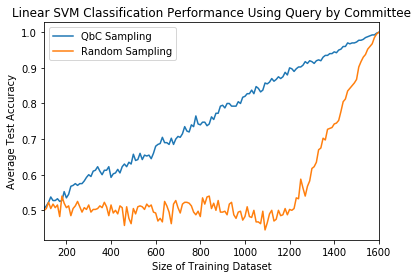

In [119]:
#Create plots and save them

q2_results_test = pd.concat([pd.DataFrame.from_dict(q2_results), pd.DataFrame.from_dict(random_q2_results)]).transpose()
q2_results_test.columns = ["QbC Sampling","Random Sampling"]

plot = q2_results_test.plot.line(title='Linear SVM Classification Performance Using Query by Committee')
plot.set_xlabel("Size of Training Dataset")
plot.set_ylabel("Average Test Accuracy")

#Display plot in Jupyter
plot

#Save plot
fig = plot.get_figure()
fig.savefig("Q2_ii.pdf")